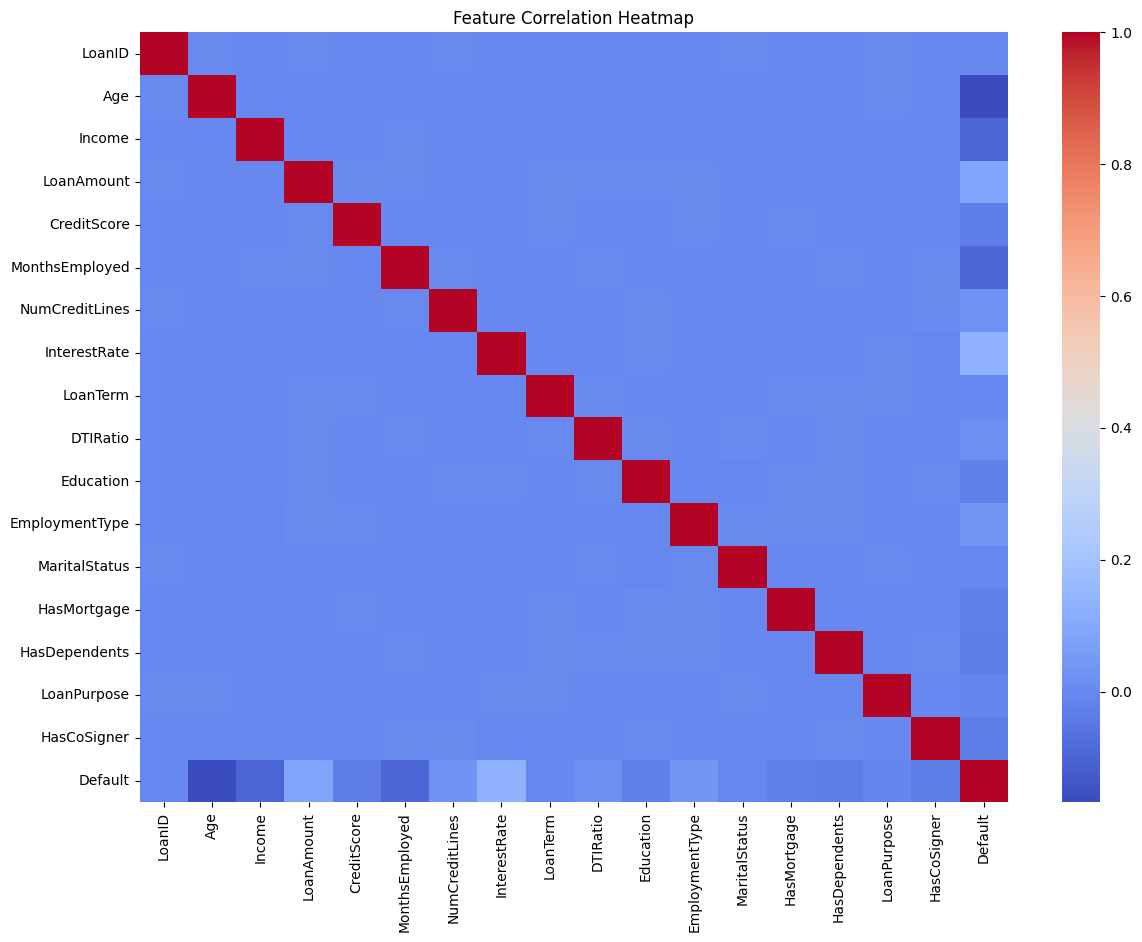

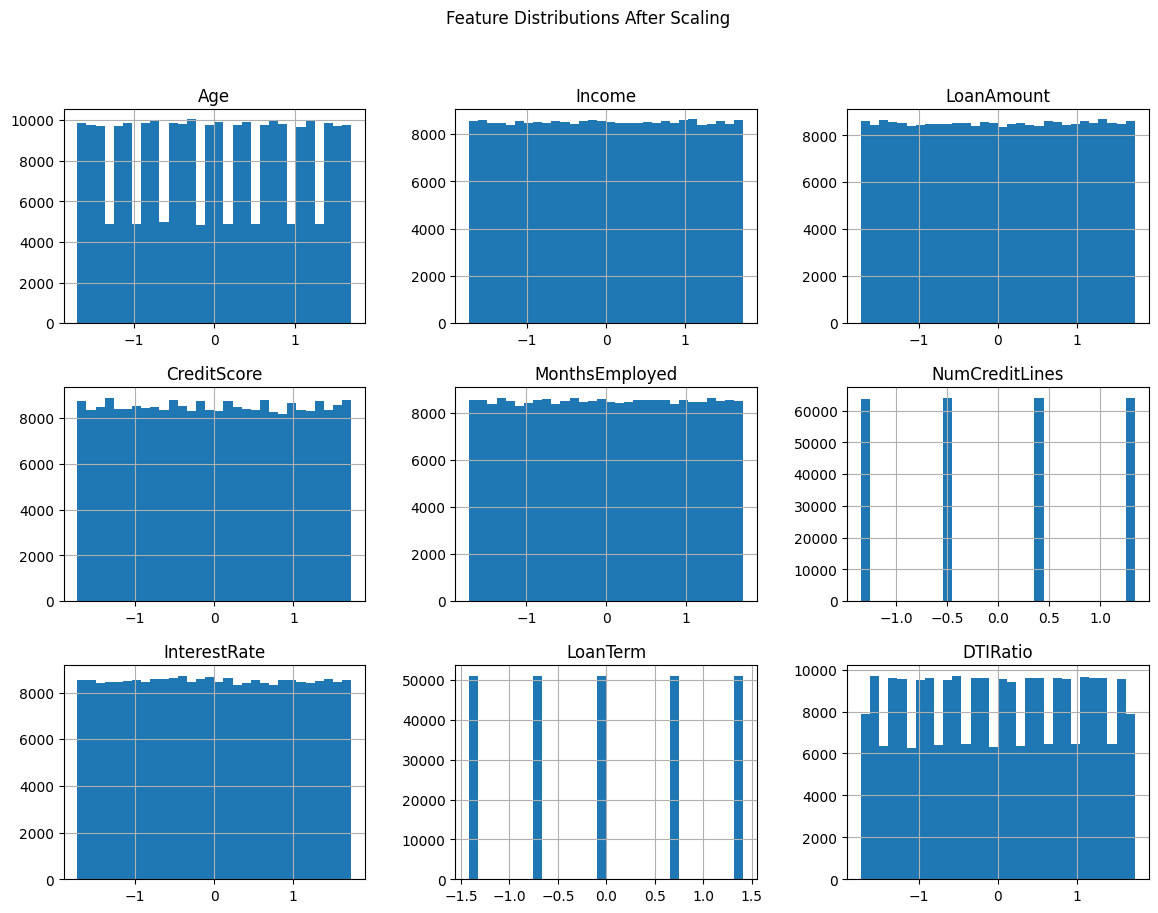

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,128027,0.833990,0.089693,-1.086833,-0.341492,0.590533,1.341937,0.261771,-0.001526,-0.260753,0,0,0,1,1,4,1,0
1,125442,1.701221,-0.823021,-0.044309,-0.731666,-1.285731,-1.343791,-1.308350,1.412793,0.778585,2,0,1,0,0,4,1,0
2,85333,0.166888,0.043854,0.022715,-0.775718,-0.968209,0.446694,1.156831,-0.708685,-0.823728,2,3,0,1,1,0,0,1
3,220129,-0.767053,-1.303452,-1.168538,1.061875,-1.718715,0.446694,-0.967805,-0.708685,-1.170174,1,0,1,0,0,1,0,0
4,105746,1.100830,-1.592855,-1.671921,0.369631,-1.487790,1.341937,-1.052188,0.705634,0.995114,0,3,0,0,1,0,0,0


In [11]:
# Step-by-step code for Phase 1: Preprocessing and EDA for Loan Default Prediction

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load dataset
df = pd.read_csv("Loan_default.csv")

# 1. Check for missing values
missing_values = df.isnull().sum()

# 2. Drop rows with missing values (or we could use imputation if needed)
df_clean = df.dropna()

# 3. Handle outliers (using IQR method for numeric columns)
numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns.drop('Default')

for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]

# 4. Encode categorical variables
categorical_cols = df_clean.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le

# 5. Feature scaling (standardization)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_clean[numeric_cols])
df_clean[numeric_cols] = scaled_features

# 6. Correlation matrix and feature distributions
plt.figure(figsize=(14, 10))
sns.heatmap(df_clean.corr(), annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Plot distributions of some key features
df_clean[numeric_cols].hist(bins=30, figsize=(14, 10))
plt.suptitle("Feature Distributions After Scaling")
plt.show()

df_clean.head()


In [18]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import joblib 

# Step 1: Separate features and target
X = df_clean.drop("Default", axis=1)
y = df_clean["Default"]

# Step 2: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Step 4: Train, predict, and evaluate
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    results[name] = {
        "Accuracy": accuracy_score(y_test, preds),
        "Precision": precision_score(y_test, preds),
        "Recall": recall_score(y_test, preds),
        "F1 Score": f1_score(y_test, preds),
        "Report": classification_report(y_test, preds)
    }
    
    if name == "XGBoost":
        joblib.dump(model, "xgboost.pkl")

# Step 5: Print summary
for model_name, metrics in results.items():
    print(f"\n🔍 {model_name} Evaluation:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"F1 Score: {metrics['F1 Score']:.4f}")
    print("Classification Report:\n", metrics["Report"])


d:\New folder\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:28:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔍 Logistic Regression Evaluation:
Accuracy: 0.8858
Precision: 0.6146
Recall: 0.0314
F1 Score: 0.0597
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.61      0.03      0.06      5900

    accuracy                           0.89     51070
   macro avg       0.75      0.51      0.50     51070
weighted avg       0.86      0.89      0.84     51070


🔍 Random Forest Evaluation:
Accuracy: 0.8869
Precision: 0.6582
Recall: 0.0441
F1 Score: 0.0826
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.66      0.04      0.08      5900

    accuracy                           0.89     51070
   macro avg       0.77      0.52      0.51     51070
weighted avg       0.86      0.89      0.84     51070


🔍 XGBoost Evaluation:
Accuracy: 0.8860
Precision: 0.5426
Recall: 0.0842
F1 Score: 0.1458
Classifica

d:\New folder\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:25:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



📊 Logistic Regression Metrics:
Accuracy:  0.8859
Precision: 0.6237
Recall:    0.0312
F1 Score:  0.0594
ROC-AUC:   0.7498


<Figure size 1000x700 with 0 Axes>

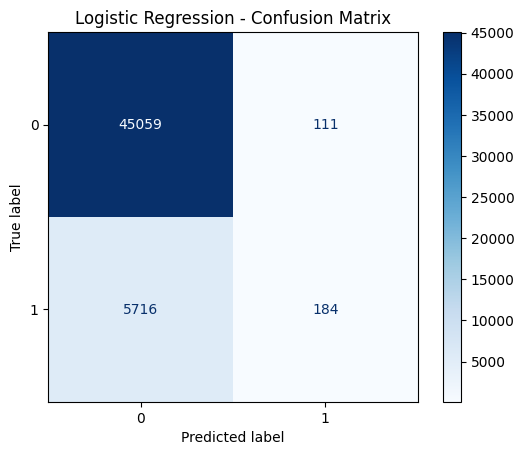


📊 Random Forest Metrics:
Accuracy:  0.8869
Precision: 0.6548
Recall:    0.0437
F1 Score:  0.0820
ROC-AUC:   0.7338


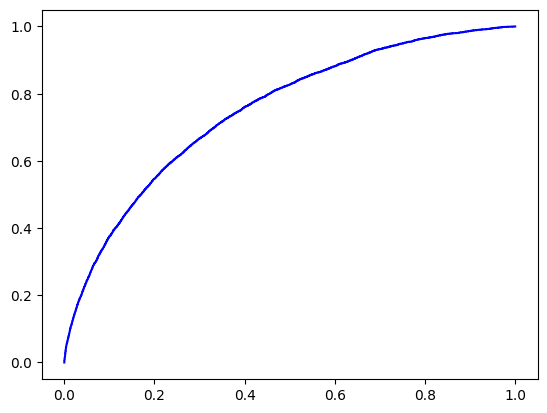

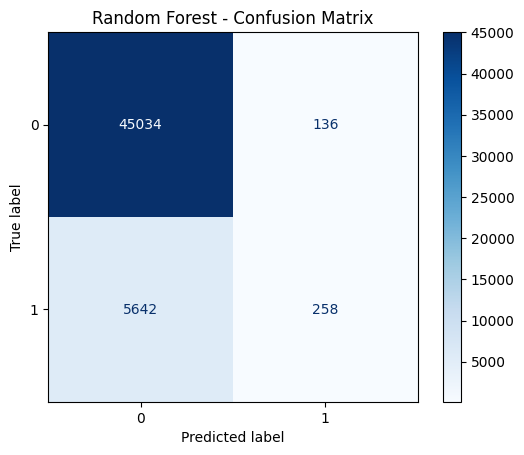


📊 XGBoost Metrics:
Accuracy:  0.8860
Precision: 0.5426
Recall:    0.0842
F1 Score:  0.1458
ROC-AUC:   0.7426


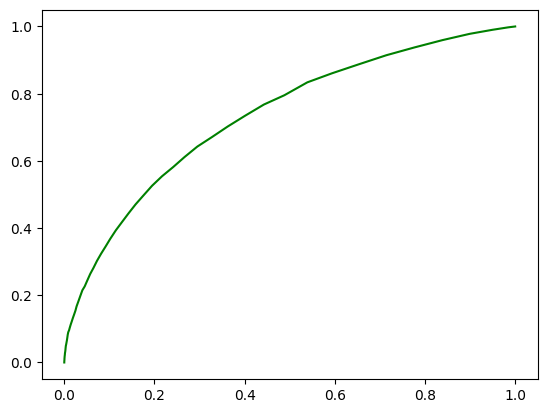

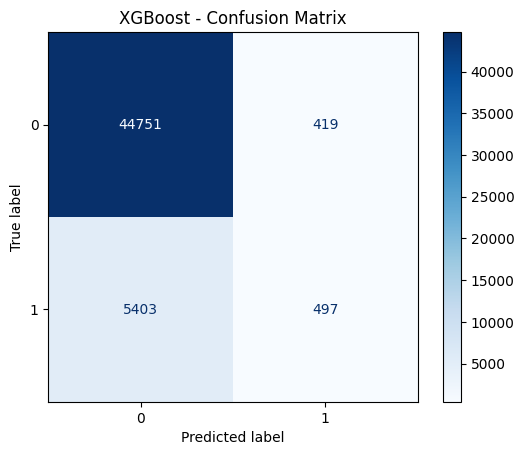

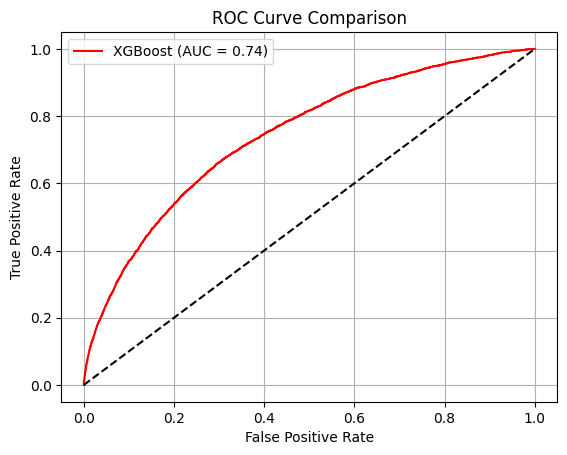

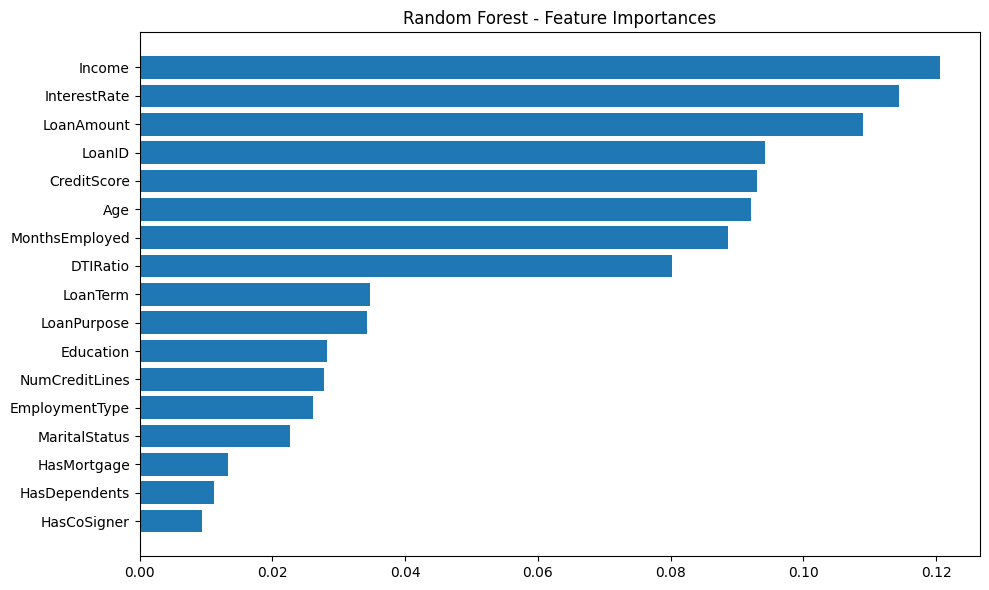

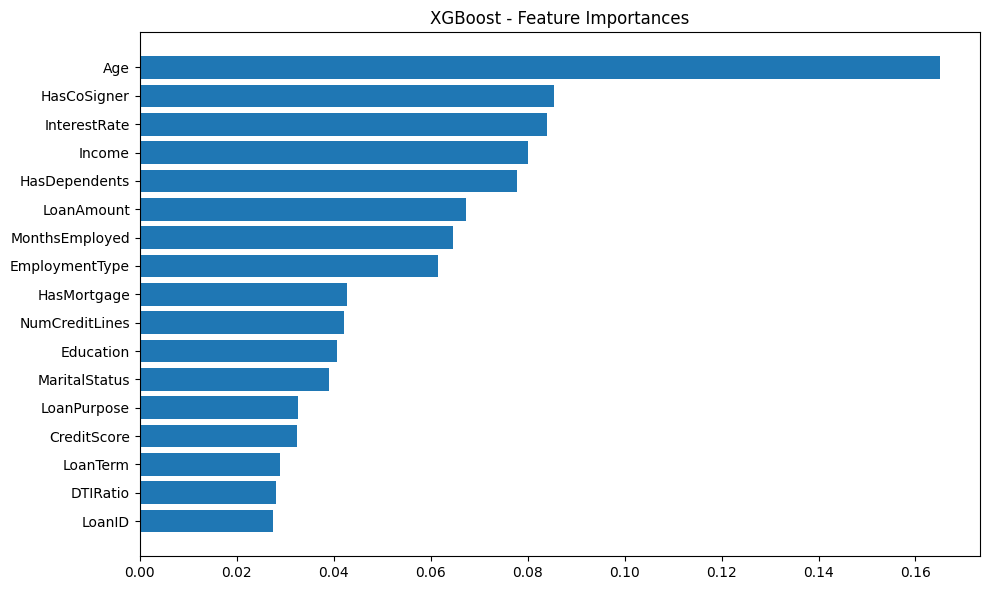

In [3]:
# Re-import necessary libraries and reload dataset after environment reset
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,roc_curve, confusion_matrix, ConfusionMatrixDisplay)
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv("Loan_default.csv")

# Drop missing values
df = df.dropna()

# Encode categorical features
categorical_cols = df.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Separate features and target
X = df.drop("Default", axis=1)
y = df["Default"]

# Normalize numeric features
scaler = StandardScaler()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train models
for model in models.values():
    model.fit(X_train, y_train)

# Plot evaluation and metrics
plt.figure(figsize=(10, 7))
colors = ['blue', 'green', 'red']
roc_auc_scores = {}

for idx, (name, model) in enumerate(models.items()):
    y_probs = model.predict_proba(X_test)[:, 1]
    y_preds = model.predict(X_test)

    # Metrics
    acc = accuracy_score(y_test, y_preds)
    prec = precision_score(y_test, y_preds)
    rec = recall_score(y_test, y_preds)
    f1 = f1_score(y_test, y_preds)
    roc_auc = roc_auc_score(y_test, y_probs)
    roc_auc_scores[name] = roc_auc

    print(f"\n📊 {name} Metrics:")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print(f"ROC-AUC:   {roc_auc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})', color=colors[idx])

# Final ROC Curve Comparison
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

# Feature importance for Random Forest and XGBoost
for name, model in models.items():
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        features = X.columns
        importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

        plt.figure(figsize=(10, 6))
        plt.barh(importance_df['Feature'], importance_df['Importance'])
        plt.title(f'{name} - Feature Importances')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()


In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

log_param_grid = {
    'C': [0.01, 0.1, 1, 10],        # Regularization strength
    'penalty': ['l2'],              # L2 regularization
    'solver': ['lbfgs']
}

grid_log = GridSearchCV(LogisticRegression(max_iter=1000), log_param_grid, cv=5, scoring='f1')
grid_log.fit(X_train, y_train)

print("Best Logistic Regression Parameters:", grid_log.best_params_)
print("Best F1 Score:", grid_log.best_score_)


Best Logistic Regression Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best F1 Score: 0.059554687988727116


In [4]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Grid Search for Random Forest
rf_params = {
    'n_estimators': [100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=rf_params,
    scoring='f1',
    cv=5,
    n_jobs=-1
)
grid_rf.fit(X_train, y_train)
best_rf_params = grid_rf.best_params_

# Grid Search for Logistic Regression
log_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

grid_log = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid=log_params,
    scoring='f1',
    cv=5,
    n_jobs=-1
)
grid_log.fit(X_train, y_train)
best_log_params = grid_log.best_params_

# Randomized Search for XGBoost
xgb_params = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

rand_xgb = RandomizedSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    param_distributions=xgb_params,
    n_iter=10,
    scoring='f1',
    cv=5,
    random_state=42,
    n_jobs=-1
)
rand_xgb.fit(X_train, y_train)
best_xgb_params = rand_xgb.best_params_

# Show best parameters
best_log_params, best_rf_params, best_xgb_params


d:\New folder\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:24:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


({'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'},
 {'max_depth': 20,
  'min_samples_leaf': 1,
  'min_samples_split': 5,
  'n_estimators': 100},
 {'subsample': 0.8,
  'n_estimators': 150,
  'max_depth': 7,
  'learning_rate': 0.2,
  'colsample_bytree': 1.0})

In [4]:
# Re-import necessary libraries after environment reset
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Reload the dataset
df = pd.read_csv("Loan_default.csv")
df.dropna(inplace=True)

# Encode categorical columns
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Separate features and target
X = df.drop("Default", axis=1)
y = df["Default"]

# Feature scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Logistic Regression with L2 Regularization
log_model_l2 = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=1000)
log_cv_l2 = cross_val_score(log_model_l2, X, y, cv=5, scoring='f1')

# Logistic Regression with L1 Regularization
log_model_l1 = LogisticRegression(penalty='l1', C=1.0, solver='liblinear')
log_cv_l1 = cross_val_score(log_model_l1, X, y, cv=5, scoring='f1')

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=5,
                                  min_samples_leaf=1, random_state=42)
rf_cv = cross_val_score(rf_model, X, y, cv=5, scoring='f1')

# XGBoost
xgb_model = XGBClassifier(n_estimators=150, learning_rate=0.2, max_depth=7,
                          subsample=0.8, colsample_bytree=1.0, use_label_encoder=False,
                          eval_metric='logloss')
xgb_cv = cross_val_score(xgb_model, X, y, cv=5, scoring='f1')

# Display results
{
    "Logistic Regression (L2)": (log_cv_l2.mean(), log_cv_l2.std()),
    "Logistic Regression (L1)": (log_cv_l1.mean(), log_cv_l1.std()),
    "Random Forest": (rf_cv.mean(), rf_cv.std()),
    "XGBoost": (xgb_cv.mean(), xgb_cv.std())
}


d:\New folder\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:51:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\New folder\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:52:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\New folder\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:53:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\New folder\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:53:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\New folder\Li

{'Logistic Regression (L2)': (np.float64(0.06088867859221142),
  np.float64(0.004257966370770993)),
 'Logistic Regression (L1)': (np.float64(0.060884616023622294),
  np.float64(0.004255112497412592)),
 'Random Forest': (np.float64(0.08228259466901225),
  np.float64(0.002642709168757494)),
 'XGBoost': (np.float64(0.14949518611360274),
  np.float64(0.005765973683074627))}

In [20]:
import streamlit as st
import joblib
import numpy as np

# Load the model
with open("xgboost.pkl", "rb") as file:
    model = joblib.load(file)

# App title
st.title("Loan Default Prediction App")

st.write("Please enter the required details:")

# Example input fields (you MUST update these based on your dataset features)
income = st.number_input("Annual Income")
age = st.number_input("Age")
loan_amount = st.number_input("Loan Amount")
credit_score = st.number_input("Credit Score")

# You can add more input fields as needed...

# Predict button
if st.button("Predict Default Risk"):
    # Create input array – order of features must match training
    input_data = np.array([[income, age, loan_amount, credit_score]])
    
    prediction = model.predict(input_data)
    
    if prediction[0] == 1:
        st.error("⚠️ The person is likely to default on the loan.")
    else:
        st.success("✅ The person is not likely to default.")



2025-06-21 18:33:05.500 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-21 18:33:05.500 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-21 18:33:05.500 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-21 18:33:05.782 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-21 18:33:05.782 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-21 18:33:05.782 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-21 18:33:05.782 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-21 18:33:05.782 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar